In [ ]:
#AMIT RAMCHANDRA MALI

In [1]:
import tensorflow as tf # Going with tensorflow/ Keras #Necessary modules are imported
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the built-in MNIST dataset 
# There is inbuilt "MNIST dataset" in Tensorflow, one of the most famous dataset of images
# there are images of handwritten digits inside 0 to 9
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()# 

# Check the shape
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)# To check whether the dataset is perfect, we are checking shape 


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


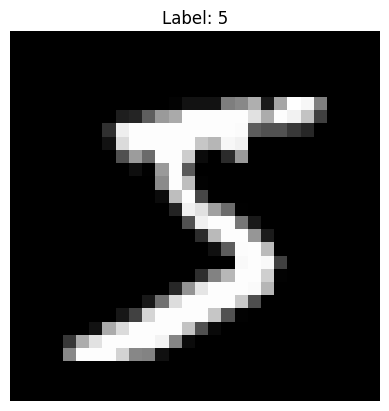

In [3]:
plt.imshow(x_train[0], cmap='gray')#Displaying one of the test case form dataset
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [4]:
# Lets perform Preprocesssing
# So there are pixel values like 0 to 255 so have to normalize it to 0 to 1, so that model trains perfectly and feeded clean data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# now Convolutional neural network(CNN) expects input as (Height, Width, Channels)
#Now images are gray scaled so channel=1
# SO resizing is needed
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [7]:
model = models.Sequential([ # Complete architecture of CNN model
    layers.Input(shape=(28, 28, 1)), 
    layers.Conv2D(32, (3, 3), activation='relu'),#1st layer
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),#Second layer

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')#Flattening and Dense layerss
])
# Model is working on ~121k trainnable parameters

In [8]:
model.summary()# provides complete summary or explains architecture of model

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Next is compiling model
model.compile(
    optimizer='adam',              # Best default optimizer
    loss='sparse_categorical_crossentropy',  # For integer labels (0–9)
    metrics=['accuracy']           # Track accuracy during training
)

In [11]:
history = model.fit(
    x_train, y_train,
    epochs=7,
    validation_split=0.1,  # 10% of training data used for validation
    batch_size=32,
    verbose=1
)# Actual model training for 7 complete single dataset loops=Epoch

Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8988 - loss: 0.3341 - val_accuracy: 0.9850 - val_loss: 0.0523
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9839 - loss: 0.0495 - val_accuracy: 0.9877 - val_loss: 0.0445
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9897 - loss: 0.0329 - val_accuracy: 0.9900 - val_loss: 0.0343
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9924 - loss: 0.0222 - val_accuracy: 0.9883 - val_loss: 0.0422
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9939 - loss: 0.0182 - val_accuracy: 0.9918 - val_loss: 0.0260
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9956 - loss: 0.0129 - val_accuracy: 0.9892 - val_loss: 0.0393
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9965 - loss: 0.0103 - val_accuracy: 0.9870 - val_loss: 0.0560


In [12]:
#Model is trained next is evaluation of model
v=test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")#Evaluation and performance of model

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9859 - loss: 0.0495
Test Loss: 0.0402
Test Accuracy: 0.9885


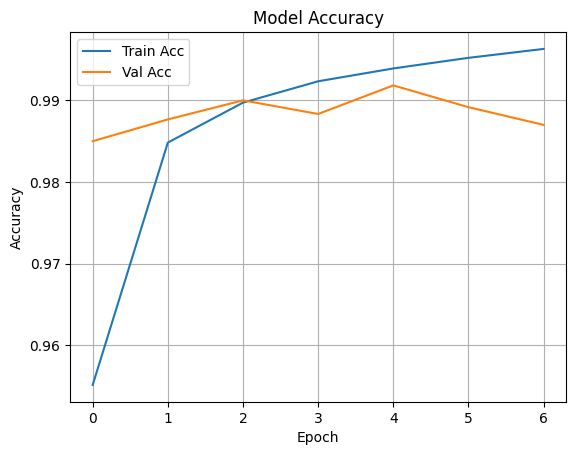

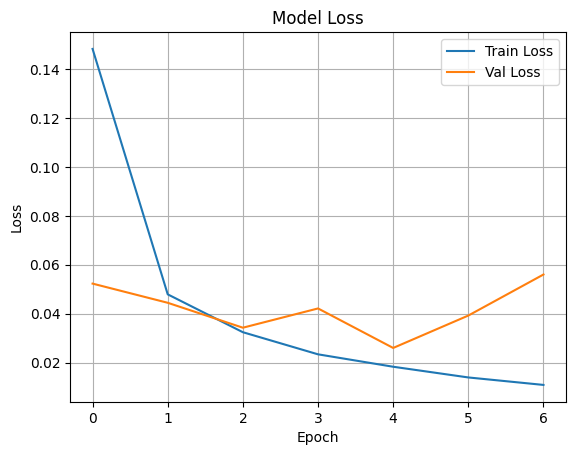

In [13]:
#Plotting Performance graphs like Accuracy and Loss
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


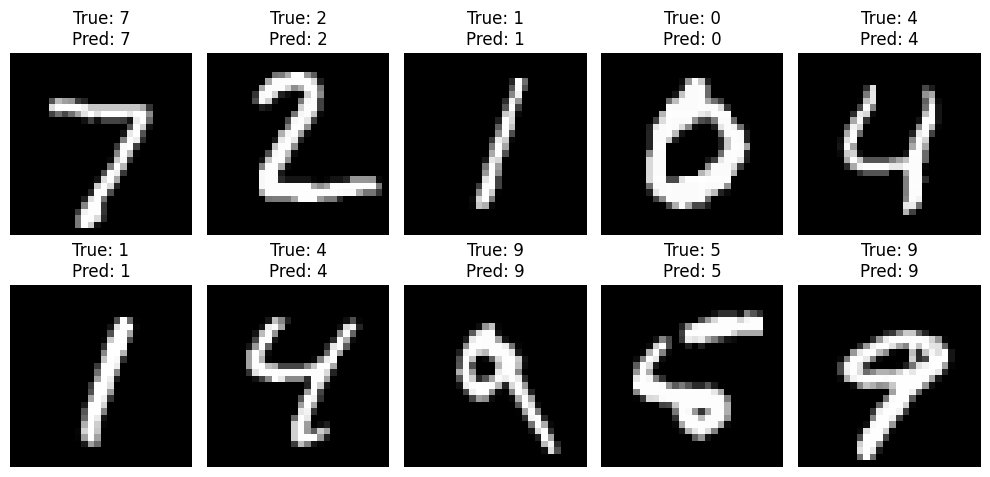

In [14]:
# Most important phase- Prediction by model on x_test
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Displaying first 10 predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
model.save("mnist_cnn_model.keras")
print("Model saved successfully!")#Saved model 

Model saved successfully!
